In [59]:
using StatsPlots, Plots
using Distributions
using Statistics, StatsBase
using CSV, DataFrames
using Dates
using LsqFit
using HypothesisTests

# using SingularSpectrumAnalysis

In [27]:
df_acf_pacf = CSV.read("data/acf_pacf_data.csv", DataFrame)

,lag,up_acf,down_acf,up_pacf,down_pacf
,Int64,Float64,Float64,Float64,Float64
1,0,1.0,1.0,1.0,1.0
2,1,0.757093,0.71715,0.757093,0.71715
3,2,-0.00194349,-0.0537371,-0.00194349,-0.0537371
4,3,0.0644042,0.0132136,0.0644042,0.0132136
5,4,0.054346,0.0024523,0.054346,0.0024523
6,5,0.0542715,0.00498325,0.0542715,0.00498325
7,6,0.0510842,-0.000914461,0.0510842,-0.000914461
8,7,0.0520055,-0.00049331,0.0520055,-0.00049331
9,8,0.0484048,-0.00415065,0.0484048,-0.00415065


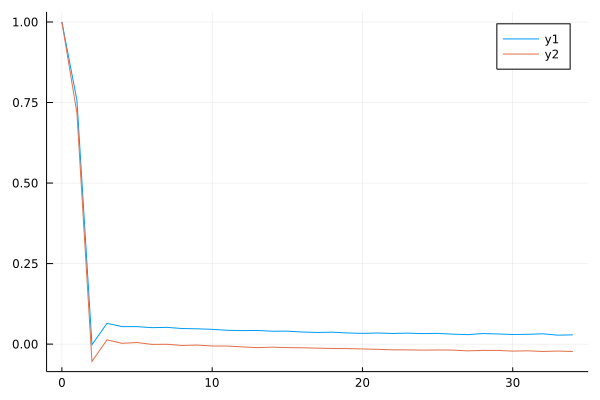

In [41]:
plot(df_acf_pacf.lag , df_acf_pacf.up_acf)
plot!(df_acf_pacf.lag , df_acf_pacf.down_acf)

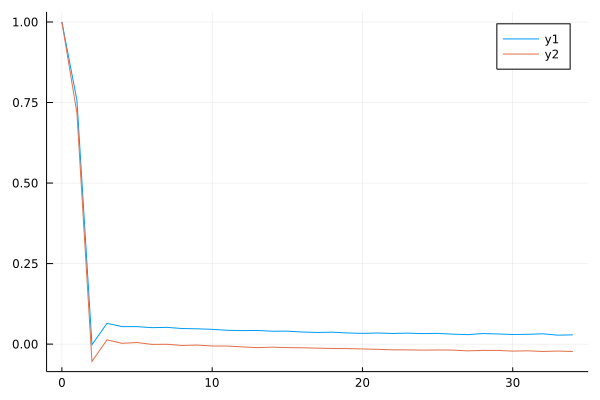

In [42]:
plot(df_acf_pacf.lag , df_acf_pacf.up_pacf)
plot!(df_acf_pacf.lag , df_acf_pacf.down_pacf)

In [43]:
df_samples_quantails = CSV.read("data/samples_quantails.csv", DataFrame)

,orginal,sample_09,sample_01,sample_095,sample_005
,Float64,Float64,Float64,Float64,Float64
1,-5.42663,16.329,-17.871,21.8318,-22.98
2,-6.88182,21.0692,-23.2273,26.6927,-29.3175
3,-0.386337,23.3215,-24.8692,29.8578,-30.9129
4,1.27871,23.0958,-25.3846,29.8947,-33.2473
5,9.99528,23.0407,-26.3062,30.857,-32.6132
6,1.22545,25.4734,-25.005,32.6284,-32.0103
7,9.28286,24.1311,-25.2459,30.3088,-32.4342
8,33.4489,24.5269,-25.5897,31.8758,-31.7541
9,33.9479,25.4624,-25.844,32.1591,-31.5954


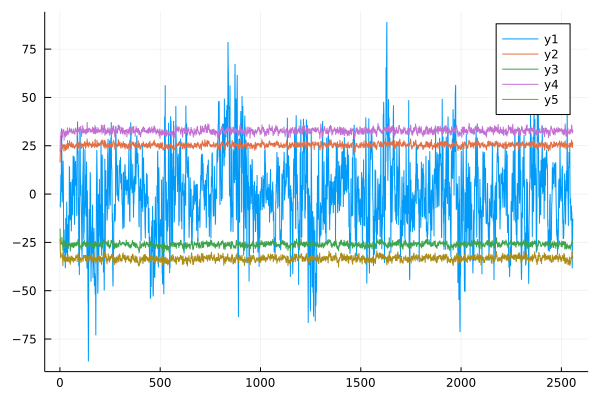

In [44]:
plot(df_samples_quantails.orginal)
plot!(df_samples_quantails.sample_09)
plot!(df_samples_quantails.sample_01)
plot!(df_samples_quantails.sample_095)
plot!(df_samples_quantails.sample_005)

In [25]:
File=CSV.read("data/residua.csv", DataFrame);
File

,Residua
,Float64
1,-5.00045
2,-2.75793
3,4.80776
4,1.51182
5,9.39456
6,-5.94089
7,9.20349
8,26.6137
9,9.35503


In [12]:
residua = File.Residua

2557-element Vector{Float64}:
  -5.000448644512043
  -2.757925119838897
   4.807761831903778
   1.5118199894717248
   9.394556067948288
  -5.940886529963929
   9.203494053436353
  26.61371871173194
   9.355026078778028
  -7.920168263059502
 -14.885010732927292
   0.41396453511940035
   5.340557048212714
   ⋮
  -1.3482959350319814
 -13.027820504621806
  -1.912444644626369
  -5.563258572467871
   2.497447498675502
  -6.186076934700597
  -2.315812448838721
 -17.42242701348708
 -21.24321859227342
   2.1220710046034483
  -1.3593887288878257
   0.6869136215305325

## Założenie o wartości średniej

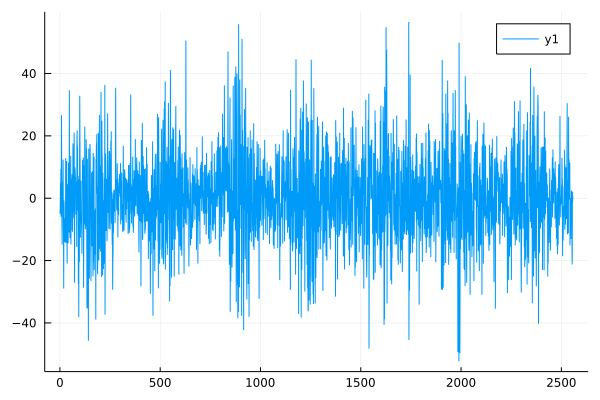

In [14]:
plot(residua)

In [23]:
OneSampleTTest(residua)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          -0.0301293
    95% confidence interval: (-0.5525, 0.4922)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.9100

Details:
    number of observations:   2557
    t-statistic:              -0.1131070512895177
    degrees of freedom:       2556
    empirical standard error: 0.26637836672369236


## Założenie o równej wariancji 

wykres  jakm wyżej

In [24]:
LeveneTest(residua)

ArgumentError: ArgumentError: FDist: the condition ν1 > zero(ν1) && ν2 > zero(ν2) is not satisfied.

## Założenie o niezależności 

In [62]:
df_residua_acf_pacf = CSV.read("data/residua_acf_pacf.csv", DataFrame);

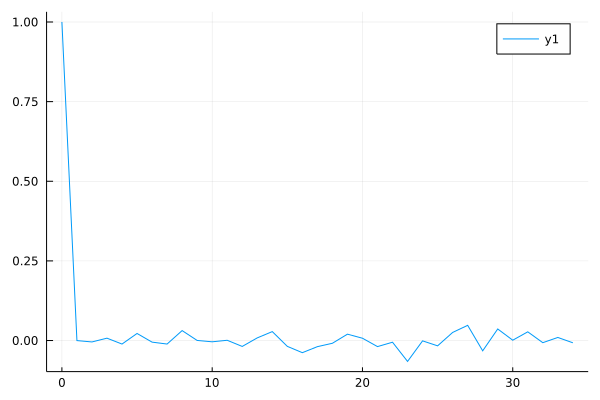

In [63]:
plot(df_residua_acf_pacf.lag, df_residua_acf_pacf.acf)

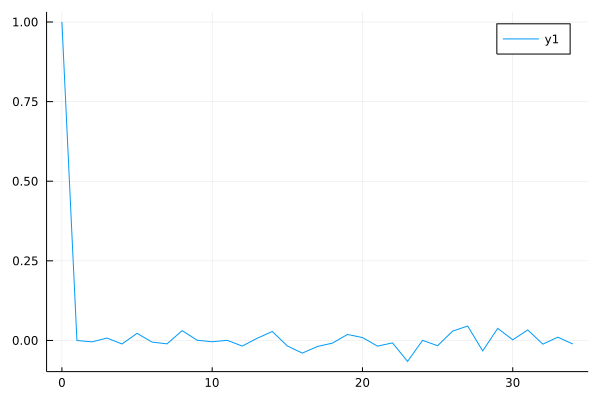

In [64]:
plot(df_residua_acf_pacf.lag, df_residua_acf_pacf.pacf)

In [71]:
LjungBoxTest(residua,1)

Ljung-Box autocorrelation test
------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.9932

Details:
    number of observations:         2557
    number of lags:                 1
    degrees of freedom correction:  0
    Q statistic:                    7.15985e-5


## Rozkład rezidów

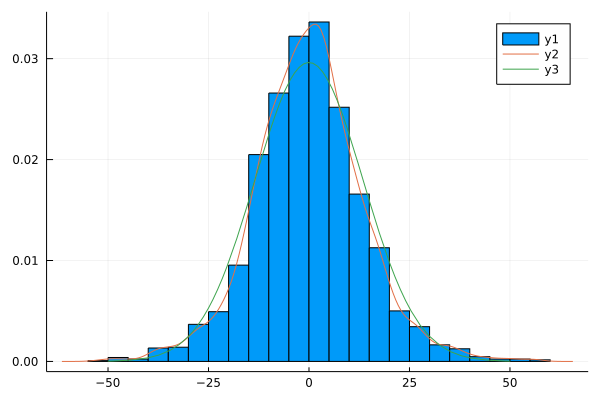

In [87]:
histogram(residua,normed=true)
density!(residua)
plot!(Normal(0,sqrt(181.35971631951247)))


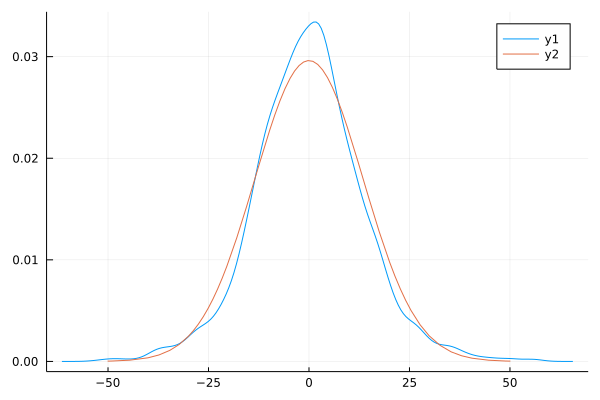

In [103]:
density(residua)
# plot!(Normal(0,sqrt(181.35971631951247)))
plot!(Normal(0,std(residua)))

In [102]:
var(residua)

181.4381593986826

In [76]:
ecdf_plot(residua)

LoadError: UndefVarError: ecdf_plot not defined

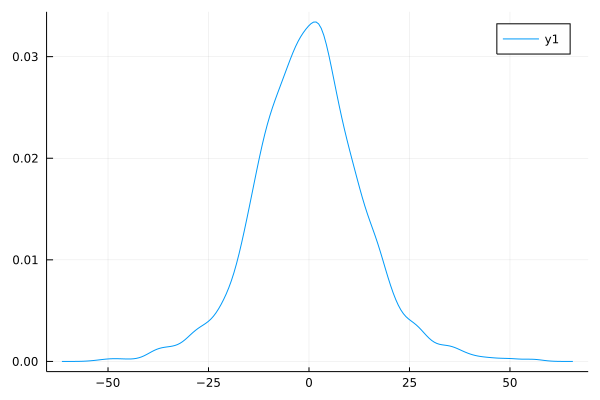

In [80]:
density(residua)

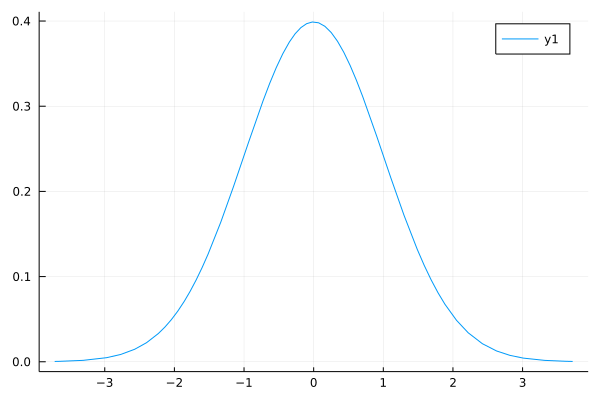

In [84]:
plot(Normal(0,1))

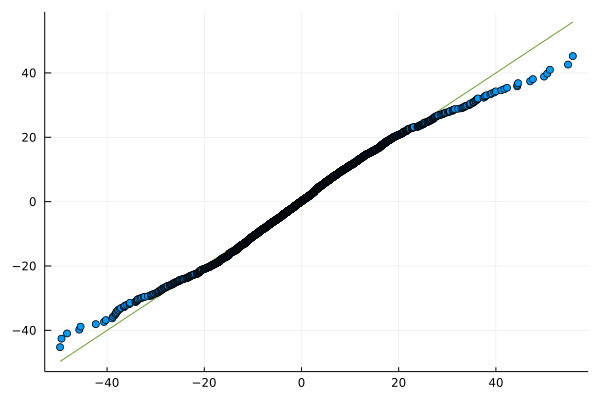

In [90]:
qqplot(residua,Normal(0,sqrt(181.35971631951247)))

In [99]:
OneSampleADTest(residua,Normal(mean(residua),std(residua)))

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0018

Details:
    number of observations:   2557
    sample mean:              -0.030129271587434628
    sample SD:                13.469898269797088
    A² statistic:             5.421318480389962


In [100]:
ExactOneSampleKSTest(residua, Normal(mean(residua),std(residua)))

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.0317352

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0113

Details:
    number of observations:   2557
